1. System Profile

2. CCBayou Data

## Problem 3: Treaty Terms for the Colorado River

### Background

The Colorado river originates in the Rocky mountains and has contributing tributaries
and/or flows through the states of Wyoming, Colorado, Utah, Nevada, Arizona,
and California. 
Prior to dams the river used to actually run to the ocean and at one
time in history actually had commerce by river boats. 
In the late 1800’s and early 1900’s the river and its tributaries were dammed and diverted. 
Around the 1920’sa legal document called the Colorado River Compact was developed. 
A Compact is similar to a treaty, except the parties to the treaty are states (essentially the individual states have entered into the treaty with the United States and Mexico). 
The Colorado River Compact divides the Colorado River into Upper and Lower Basins with the division being at Lee Ferry on the Colorado River one mile below the Paria River in Arizona.
The Lower Basin states are Arizona, California, and Nevada, with small portions of New Mexico and Utah that are tributary to the Colorado River below Lee Ferry. The Upper Basin states are Colorado, New Mexico, Utah, and Wyoming, with a small portion of Arizona tributary to the Colorado River above Lee Ferry.

Article III of the Compact apportions the waters of the Colorado River to the Upper
and Lower Basins as follows:
The Compact apportions the right to exclusive beneficial consumptive use of 7.5
million acre-feet of water per year from the ”Colorado River System” in perpetuity
to the Upper Basin and the Lower Basin.
The Compact allows an additional 1.0 million acre-feet per year of increased beneficial
consumptive use to the Lower Basin.
It provides water for Mexico pursuant to treaty. Water must first come from any
surplus over the waters allocated to the states in Article III(a) and (b). If that
surplus is insufficient, then the burden of that deficiency shall be shared equally by
the Upper and Lower Basins.
The Compact provides that the Upper Basin states will not cause the flow of the
river at Lee Ferry, Arizona to be depleted below an aggregate of 75 million acrefeet
for any period of ten consecutive years beginning with the ratification of the
Compact.
It provides that the Upper Basin states will not withhold water and the states of the
Lower Basin shall not require delivery of water which cannot reasonably be applied
to domestic and agricultural uses.

## Problem Statement

The file named [colorado.txt](http://54.243.252.9/engr-1330-webroot/4-Databases/colorado.txt) contains annual natural flows volumes in the upper
Colorado river basin from 1906 to present. These flows are historical reconstruction
at approximately the same location as the current USGS gage 09380000. The
location is approximately above (upstream of) Lee Ferry, hence the data represent
the flows out of the upper basin.
The data are in two columns, the first is the water year, the second column is
cumulative discharge for the year in units of acre-feet.

    YEAR ANNUAL.VOLUME
    1906 18550021
    1907 21201694
    1908 12218817
    1909 22356301
    1910 14650616
    ...
Prepare an analysis of the data to support or refute the provisions of the Compact.
You can assume that the data from 1906 to 1927 (the original Compact was ratified
in 1922, many additional Compacts have been signed since that time, all trying to reapportion
water in the river basin witout violating the original agreement) were available to the
authors of the Colorado River Compact, analyze this period of data and decide if the
allocations to the lower basin are realistic (8.5 million acre-feet-per year) assuming
the upper basin allocation is removed. Consumptive use means that the water will
not return to the basin. The data are ’natural’ flows and the upper basin allocations
are not removed in the data. 

<hr/><hr/> 

**Step 1:** 

<hr/>

Read the "colorado.txt" file as a dataframe. Explore the dataframe and in a markdown cell breifly describe the summarize the dataframe. <br>

In [ ]:
# download the data file
# read into a dataframe
# plot
# describe the dataframe

<hr/><hr/> 

**Step 2:** 

<hr/>

Evaluate if the mean value in the pre-compact period is substantially different from the post-compact period. <br>

In [3]:
# split the data into pre-compact and post-compact
# describe the two subsets
# box-plot both
# test for normal
# hypothesis test for difference in means
# conclusion(s) 

<hr/><hr/> 

**Step 3:** 

<hr/>

Estimate the probability based on the the 20-year period that the lower basin allocation will not be met if upper basin allocation is satisfied. Estimate the probability that the allocation will not be met using the entire data set if the upper basin allocation is satisfied.<br>

In [ ]:
# empirical probability approach on the 20 years pre-compact; full data

<hr/><hr/> 

**Step 4:** 

<hr/>

Next assume that lower basin is satisfied first (this is the historical result of the
original and subsequent treaties). Estimate the probability that the upper basin
allocation will not be met. Determine an upper basin allocation that will be met
95% of the time. Again use the 20 year initial record, then the entire record.

In [5]:
# empirical probability approach on the 20 years pre-compact; full data

<hr/><hr/> 

**Step 5:** 

<hr/>

Was the initial 20 year period sufficiently different from the later data that the
Compact authors made decisions based on unusually high or low flows?

In [6]:
# make a decision and report

,YEAR,ANNUAL.VOLUME
count,98.000000,9.800000e+01
mean,1954.500000,1.508335e+07
std,28.434134,4.445773e+06
min,1906.000000,5.407262e+06
25%,1930.250000,1.143192e+07
50%,1954.500000,1.489496e+07
75%,1978.750000,1.831991e+07
max,2003.000000,2.539764e+07


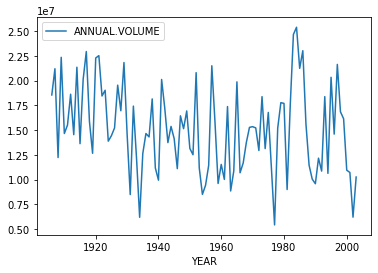

In [2]:
import pandas as pd
import numpy as np
colorado_df = pd.read_table("colorado.txt") # Read the file as a table assign to a dataframe 
colorado_df.plot.line(x='YEAR', y='ANNUAL.VOLUME')
colorado_df.describe()

We can kind of use the description to answer our questions.  
Estimate the probability based on the the 20-year period that the lower basin allocation will not be met if upper basin allocation is satisfied

First filter the data

,YEAR,ANNUAL.VOLUME
count,22.000000,2.200000e+01
mean,1916.500000,1.770751e+07
std,6.493587,3.542334e+06
min,1906.000000,1.221882e+07
25%,1911.250000,1.456493e+07
50%,1916.500000,1.849861e+07
75%,1921.750000,2.093699e+07
max,1927.000000,2.294280e+07


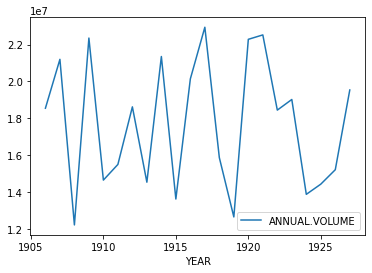

In [23]:
junkdf = colorado_df[colorado_df['YEAR'] <= 1927] # screen by year
junkdf.plot.line(x='YEAR', y='ANNUAL.VOLUME') # plot the first 22 years
junkdf.describe()

Then observe that the minimum is 12 million, so the upper basin's 7.5 million is satisfied all 22 years (yay for the upstreamers!)
If the downstreamers get their allocation the total in the river needs to be 15 million, so the question is what fraction of observations is less than 15 million, that fraction is an estimate of the probability downstreamers won't get their water.

In [24]:
result1 = junkdf.count()
result2 = junkdf[junkdf['ANNUAL.VOLUME'] < 15.0E6].count()
print ('Probability Downstreamers Wont Get their Agua =%.3f' % (result2[0]/result1[0]))

Probability Downstreamers Wont Get their Agua =0.318


The fraction is about 1/3; so 33% of the time, downstreamers won't get their water!

Estimate the probability that the allocation will not be met using the entire data set if the upper basin allocation is satisfied.
Here we use the same logic and scripts but dont need the date filter

In [25]:
result1 = colorado_df.count()
result2 = colorado_df[colorado_df['ANNUAL.VOLUME'] < 15.0E6].count()
print ("Probability Downstreamers Wont Get their Agua =%.3f " % (result2[0]/result1[0]))

Probability Downstreamers Wont Get their Agua =0.500 


So the downstreamers wont get water 1/2 the time.

Next assume that lower basin is satisfied first (this is the historical result of the original and subsequent treaties). 
Determine an upper basin allocation that will be met 95% of the time. 

Again use the 22 year initial record, then the entire record.

In [26]:
result1 = junkdf.count()
result2 = junkdf[junkdf['ANNUAL.VOLUME'] > 12.5e6].count()
print ('Probability Uptreamers Will Get their Agua based on 22 years =%.3f' % (result2[0]/result1[0]))
print ('Allocation Upstream =%.3f' % (12.5e6 - 7.5e6))
result1 = colorado_df.count()
result2 = colorado_df[colorado_df['ANNUAL.VOLUME'] > 8.5e6].count()
print ('Probability Uptreamers Will Get their Agua based on 98 years =%.3f' % (result2[0]/result1[0]))
print ('Allocation Upstream =%.3f' % (8.5e6 - 7.5e6))

Probability Uptreamers Will Get their Agua based on 22 years =0.955
Allocation Upstream =5000000.000
Probability Uptreamers Will Get their Agua based on 98 years =0.949
Allocation Upstream =1000000.000


So based on 22 years of record, 5 million acre feet allocation would be satisfied 95% of the time.
Using the entire record, only 1 million acre feet was available for the upstream - interestingly that same extra 1 million already available to the downstreamers.

Not a favorable contract for Upstreamers and Mexico, the big error was the choice of absolute volumes; flow fractions would have made more sense and still kept lawyers busy.  

One observation in https://en.wikipedia.org/wiki/Cadillac_Desert notes that the base years were unusually wet - we can assess that claim using our hypothesis testing tools.  First we will check for normality

In [27]:
newjunkdf = colorado_df[colorado_df['YEAR'] > 1927] # screen by year
stat, p = stats.normaltest(junkdf['ANNUAL.VOLUME'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably normal distributed')
else:
    print('Probably Not-normal distributed')
    stat, p = stats.normaltest(newjunkdf['ANNUAL.VOLUME'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably normal distributed')
else:
    print('Probably Not-normal distributed')

statistic=7.070, p-value at rejection =0.029
Probably Not-normal distributed
statistic=2.071, p-value at rejection =0.355
Probably normal distributed


So the first portion of the data seem non-normal, the later quite normal, likely a consequence of moderate sample size (80-ish) and a bounded physical process (infinite discharge makes no sense, less then zero also undefined).  Lets ask Shirely and Laverne what they think about variance.

In [28]:
stat, p = stats.levene(junkdf['ANNUAL.VOLUME'],newjunkdf['ANNUAL.VOLUME'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably homoscedastic')
else:
    print('Probably heteroscedastic')

statistic=0.907, p-value at rejection =0.343
Probably homoscedastic


So we have non-static variance, from the plots it looks to be increasing with respect to time, a quick check

In [29]:
oldvar = (junkdf['ANNUAL.VOLUME'].std())**2
newvar = (newjunkdf['ANNUAL.VOLUME'].std())**2
print('Variance first 22 years =%.3e' % oldvar)
print('Variance last 86 years =%.3e' % newvar)

Variance first 22 years =1.255e+13
Variance last 86 years =1.944e+13


So the variance increased in the more reçent years, lets check means

In [30]:
oldmean = (junkdf['ANNUAL.VOLUME'].mean())
newmean = (newjunkdf['ANNUAL.VOLUME'].mean())
print('Mean first 22 years =%.3e' % oldmean)
print('Mean last 86 years =%.3e' % newmean)

Mean first 22 years =1.771e+07
Mean last 86 years =1.432e+07


So there is evidence that the early years were wetter, by about 3 million acre feet.  Lets examine if the difference is significant using our hypothesis testing tools.

In [31]:
stat, p = mannwhitneyu(junkdf['ANNUAL.VOLUME'],newjunkdf['ANNUAL.VOLUME'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=453.000, p-value at rejection =0.001
Probably different distributions


Based on the Mann-Whitney test the statement in Cadillac Desert is defendible, the early years are indeed different (wetter) with a small p-value, so its  likely the difference is not random.

### Exercise
If you were to rewrite the Compact provisions today, assuming that the original
intent was to divide the water between upper and lower basin in a 46% 54% split,
what annual allocations would you recomend as ’firm’ water at 90% reliability?

<hr>

## Problem 5: Watershed Response Metrics (20 points)

### Background 
Rainfall-Runoff response prediction is a vital step in engineering design for mitigating flood-induced infrastructure failure.   One easy to measure characteristic of a watershed is its drainage area.  Harder to quantify are its characteristic response time, and its conversion (of precipitation into runoff) factor.

### Study Database

The [watersheds.csv](http://54.243.252.9/engr-1330-webroot/4-Databases/watersheds.csv) dataset contains (measured)drainage area for 92 study watersheds in Texas (cite source), and the accompanying data:

|Columns|Info.|
|:---|:---|
|STATION_ID |USGS HUC-8 Station ID code|
|TDA |Total drainage area (sq. miles) |
|RCOEF|Runoff Ratio (Runoff Depth/Precipitation Depth)|
|TPEAK|Characteristic Time (minutes)|
|FPEAK|Peaking factor (same as NRCS factor)|
|QP_OBS|Observed peak discharge (measured)|
|QP_MOD|Modeled peak discharge (modeled)| 

### Assess the data:

Using the following steps, assess the utility of the response metric.


<hr/><hr/> 

**Step 1:** 

<hr/>

Read the "watersheds.csv" file as a dataframe. Explore the dataframe and in a markdown cell breifly describe the summarize the dataframe. <br>

In [22]:
# import packages
# read data file
# summarize contents + markdown cell as needed

<hr/><hr/> 

**Step 2:** <hr/>

Using your laboratory scripts as a guide, assess the utility of **TDA** as a predictor of **TPEAK** (e.g. perform a regression and produce plots, with **TDA** on the x-axis) <br>

In [23]:
# extract lists to use Lab21 example scripts
# log transform as needed
# regression fits, include plots of data regression line, uncertainty lines

# + markdown cell as needed

<hr/><hr/> 

**Step 3:**

<hr/>

Using your laboratory scripts as a guide, assess the utility of **log(TDA)** as a predictor of **TPEAK** (e.g. perform a regression and produce plots, with **log(TDA)** on the x-axis)

Which mapping of **TDA**  (arithmetic or logarithmic) produces a more useful graph? 

In [24]:
# extract lists to use Lab21 example scripts
# log transform as needed
# regression fits, include plots of data regression line, uncertainty lines

# + markdown cell as needed

<hr/><hr/> 

**Step 4:**

<hr/>

Using your laboratory scripts as a guide, assess the performance of the underlying (not disclosed) model, using **QP_MOD** as a predictor of **QP_OBS** (e.g. perform a regression and produce plots, with **QP_MOD** on the x-axis).

Include an equal value line (x=y) on the plot and make an assertion of model bias (does the model overpredict or underpredict the observations?)
<br>

In [1]:
# extract lists to use Lab21 example scripts
# log transform as needed
# regression fits, include plots of data regression line, uncertainty lines

# + markdown cell as needed

1. Classification